In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

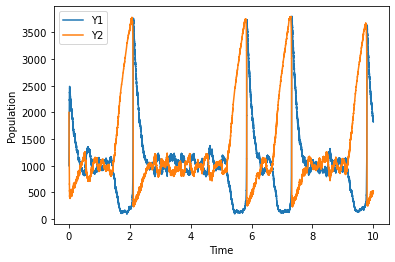

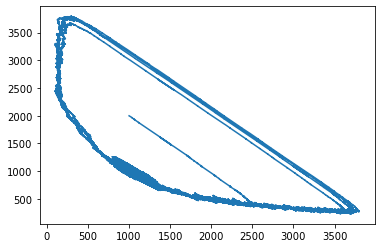

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Define the rates
k1 = 5000
k2 = 50
k3 = 5 * 10**-5
k4 = 5

# Initial populations
Y1 = 1000
Y2 = 2000

def propensity(Y1, Y2, k1, k2, k3, k4):
    a1 = k1
    a2 = k2 * Y1
    a3 = Y1 * Y1 * Y2 * k3
    a4 = k4 * Y1
    
    return np.array([a1, a2, a3, a4])

def run_brusselator(Y1, Y2, k1, k2, k3, k4):
    current_time = 0
    population_distribution = []
    time_points = []

    while Y1 > 0 and Y2 > 0 and current_time < 10:
        a = propensity(Y1, Y2, k1, k2, k3, k4)
        a0 = np.sum(a)
        U = random.random()
        # Generate tau using the inverse transform method
        tau = -math.log(1 - U)/a0
        current_time += tau
        time_points.append(current_time)

        # Determine which reaction occurs
        r = random.random() * a0
        if r < a[0]:
            Y1 += 1
        elif r < a[0] + a[1]:
            Y1 -= 1
            Y2 += 1
        elif r < a[0] + a[1] + a[2]:
            Y1 += 1
            Y2 -= 1
        else:
            Y1 -= 1
            
        population_distribution.append([Y1, Y2])

    return current_time, population_distribution, time_points

time, population, time_points = run_brusselator(Y1, Y2, k1, k2, k3, k4)

Y1_values = [item[0] for item in population]
Y2_values = [item[1] for item in population]

plt.plot(time_points, Y1_values, label='Y1')
plt.plot(time_points, Y2_values, label='Y2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

plt.plot(Y1_values, Y2_values)


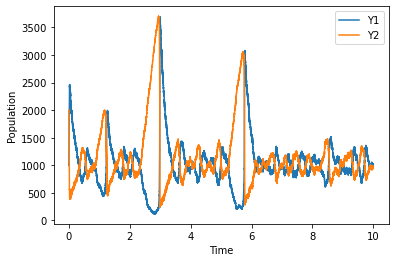

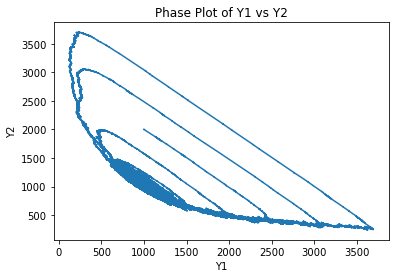

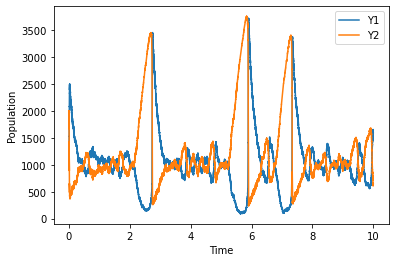

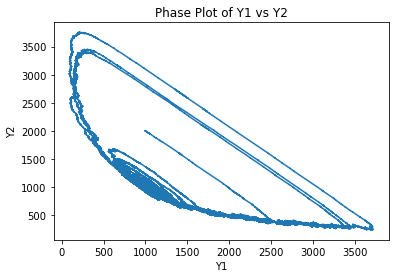

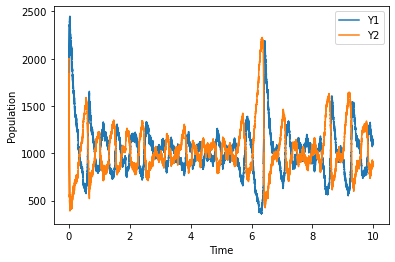

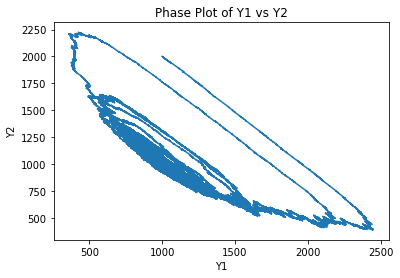

In [28]:
Y1 = [1000, 5000, 500]
Y2 = [4000, 5000, 500]

for i in range(len(Y2)): 
    time, population, time_points = run_brusselator(Y1_values[i], Y2_values[i], k1, k2, k3, k4)
    Y1_values = [item[0] for item in population]
    Y2_values = [item[1] for item in population]
    
    plt.plot(time_points, Y1_values, label='Y1')
    plt.plot(time_points, Y2_values, label='Y2')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

    # Make a second plot
    plt.plot(Y1_values, Y2_values)
    plt.xlabel('Y1')
    plt.ylabel('Y2')
    plt.title('Phase Plot of Y1 vs Y2')
    plt.show()